In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_fashion_mnist_data()
print(f"x_train.shape = {x_train.shape}, x_val.shape = {x_val.shape}")

x_train.shape = (55000, 28, 28), x_val.shape = (5000, 28, 28)


In [3]:
utils.reset_session()

dropout_layer = keras.layers.Dropout(0.5)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dropout_layer,
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
], name='dropout_encoder')
dropout_encoder.summary()

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
], name='dropout_decoder')
dropout_decoder.summary()

autoencoder = keras.models.Sequential([dropout_encoder, dropout_decoder])

autoencoder.compile(
    loss='binary_crossentropy', 
    optimizer=keras.optimizers.SGD(0.1),
    metrics=[utils.rounded_accuracy]
)

history = autoencoder.fit(
    x_train, x_train, 
    epochs=10,
    validation_data=(x_val, x_val)
)

Model: "dropout_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________
Model: "dropout_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               3100      
______________________

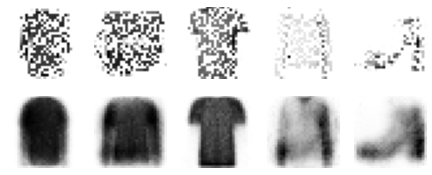

In [4]:
utils.reconstruct(autoencoder, dropout_layer(x_val[:5], training=True))